<a href="https://colab.research.google.com/github/DominicLuo/DS-4200-hw4/blob/main/homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS4200 Homework 4

Due: Friday Nov 15th @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file included with the coding results to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted files represent your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the files to gradescope.

### Tips for success
- Start early
- Make use of Piazza
- Make use of Office hour
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

# 新段落

# Use this link to run the code! : )
## https://drive.google.com/drive/folders/11R-S2FXfrWDKWPwJsLRNn7x5RcnJ0mH2?usp=sharing

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/My Drive/ds 4200/hw4/gapminder-health-income.csv'
df = pd.read_csv(file_path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,country,income,health,population,region
0,Afghanistan,1925,57.63,32526562,south_asia
1,Albania,10620,76.00,2896679,europe_central_asia
2,Algeria,13434,76.50,39666519,middle_east_north_africa
3,Andorra,46577,84.10,70473,europe_central_asia
4,Angola,7615,61.00,25021974,sub_saharan_africa


## Part 1: Altair interactive plots

Gapminder is a non-profit organization that promotes global sustainable development and seeks to bridge the gap between misconceptions and data-driven understanding. We are going to explore the a small subset of its data with the information of average income, health score and population for each country in the world. The region information is also provided.

In [ ]:
import altair as alt
import pandas as pd

gapminder = df
gapminder.head()

,country,income,health,population,region
0,Afghanistan,1925,57.63,32526562,south_asia
1,Albania,10620,76.00,2896679,europe_central_asia
2,Algeria,13434,76.50,39666519,middle_east_north_africa
3,Andorra,46577,84.10,70473,europe_central_asia
4,Angola,7615,61.00,25021974,sub_saharan_africa


### Part 1.1 Add selection (5 points)

Make a scatter plot to show the relationship between average personal income and average health score. Use the Region as the original color. Please add tooltip to it to show the information about the country name and population. Also, allow the user to select a single country to highlight while all the other become light grey.

In [ ]:
base = alt.Chart(gapminder).mark_circle(size=60).encode(
    x=alt.X('income:Q', title='Average Income'),
    y=alt.Y('health:Q', title='Average Health Score'),
    color=alt.Color('region:N', title='Region'),
    tooltip=[alt.Tooltip('country:N', title='Country'),
             alt.Tooltip('population:Q', title='Population')]
).properties(
    width=700,
    height=500,
    title="Income vs Health with Region Color"
)

# add selection for single country highlight
highlight = alt.selection_single(on='mouseover', fields=['country'], empty='none')

# modify chart to include selection behavior
interactive_chart = base.add_selection(
    highlight
).encode(
    opacity=alt.condition(highlight, alt.value(1), alt.value(0.3))
)

interactive_chart


alt.Chart(...)

### Part 1.2 Customize the color (10 points)

Now choose a customized color map for the previous question. Explain how you choose the color map and apply it to the plot.

In [ ]:
color_scale = alt.Scale(
    domain=[
        "south_asia",
        "europe_central_asia",
        "middle_east_north_africa",
        "sub_saharan_africa",
        "east_asia_pacific",
        "north_america",
        "latin_america_caribbean"
    ],
    range=["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2"]
)

# modify the chart to use the custom color scale
custom_color_chart = base.encode(
    color=alt.Color('region:N', scale=color_scale, title='Region')
).add_selection(
    highlight
).encode(
    opacity=alt.condition(highlight, alt.value(1), alt.value(0.3))
)

custom_color_chart


alt.Chart(...)

### Part 1.3 Select across multiple panels (5 points)

Now add an interval selection such that the user can select over any income range, such that we can generate a second plot to show the relationship between income and population for the given range.

In [ ]:
income_selection = alt.selection_interval(encodings=['x'])

# income vs Health with interval selection
income_health_plot = alt.Chart(gapminder).mark_circle(size=60).encode(
    x=alt.X('income:Q', title='Average Income'),
    y=alt.Y('health:Q', title='Average Health Score'),
    color=alt.Color('region:N', title='Region'),
    tooltip=[alt.Tooltip('country:N', title='Country'), alt.Tooltip('population:Q', title='Population')]
).add_selection(
    income_selection
).properties(
    width=700,
    height=300,
    title='Income vs Health with Selection'
)

# income vs Population reflecting the selected range
income_population_plot = alt.Chart(gapminder).mark_circle(size=60).encode(
    x=alt.X('income:Q', title='Average Income'),
    y=alt.Y('population:Q', title='Population'),
    color=alt.Color('region:N', title='Region'),
    tooltip=[alt.Tooltip('country:N', title='Country'), alt.Tooltip('population:Q', title='Population')]
).transform_filter(
    income_selection
).properties(
    width=700,
    height=300,
    title='Income vs Population (Filtered by Selection)'
)

# combine the plots
final_chart = alt.vconcat(
    income_health_plot,
    income_population_plot
)

final_chart

alt.VConcatChart(...)

### Part 1.4 Data binding (10 points)

Instead of the using the legend, now include a radio button or the region such that each selection only highlights one region and make the other points to be grey.

In [ ]:
region_selection = alt.selection_single(
    fields=['region'],
    bind=alt.binding_radio(options=gapminder['region'].unique().tolist()),
    name='Select Region'
)

# define the base chart
base = alt.Chart(gapminder).mark_circle(size=60).encode(
    x=alt.X('income:Q', title='Average Income'),
    y=alt.Y('health:Q', title='Average Health Score'),
    color=alt.condition(
        region_selection,
        alt.Color('region:N', legend=None),
        alt.value('lightgrey')
    ),
    tooltip=['country:N', 'income:Q', 'health:Q', 'region:N']
).add_selection(
    region_selection  # Add the selection to the chart
).properties(
    width=700,
    height=500,
    title='Highlight Region with Radio Button'
)

base


alt.Chart(...)

### Part 1.5 Add filter with bars (10 points)

Add a slider bar such that for a given value on the bar, we only show the data such that the population of the country is less than the value.

In [ ]:
# Create slider
population_slider = alt.binding_range(
    name="Population Threshold",
    min=0,
    max=gapminder['population'].max(),
    step=1000000
)

# Create slider choices
slider_selection = alt.selection_single(
    fields=['population'],
    bind=population_slider,
    init={'population': gapminder['population'].max()}
)

# plot
test_chart = alt.Chart(gapminder).mark_circle(size=60).encode(
    x=alt.X('income:Q', title='Average Income'),
    y=alt.Y('health:Q', title='Average Health Score'),
    tooltip=['country:N', 'population:Q'],
    color='region:N'
).transform_filter(
    alt.datum.population < slider_selection.population
).add_selection(
    slider_selection
)

test_chart


alt.Chart(...)

### Part 2 Explore the TX population and unemployment rate
#### Part 2.1 Prepare the geospatial data (10 points)

On Canvas, there is a csv file called "unemp.csv", which contains county-level information about unemployment rate and population. Use county level geo-spatial data provided in the lecture to merge two datasets. Then extract the part of data for Texas and make a map for Texas county. Only show the boundary for the counties.

Note: Texas has 254 counties, more than any other U.S. state.

In [ ]:
file_path2 = '/content/drive/My Drive/ds 4200/hw4/unemp.csv'
df2 = pd.read_csv(file_path2)
df2.head()

,Unnamed: 0,fips,pop,unemp
0,1,1001,23288,9.7
1,2,1003,81706,9.1
2,3,1005,9703,13.4
3,4,1007,8475,12.1
4,5,1009,25306,9.9


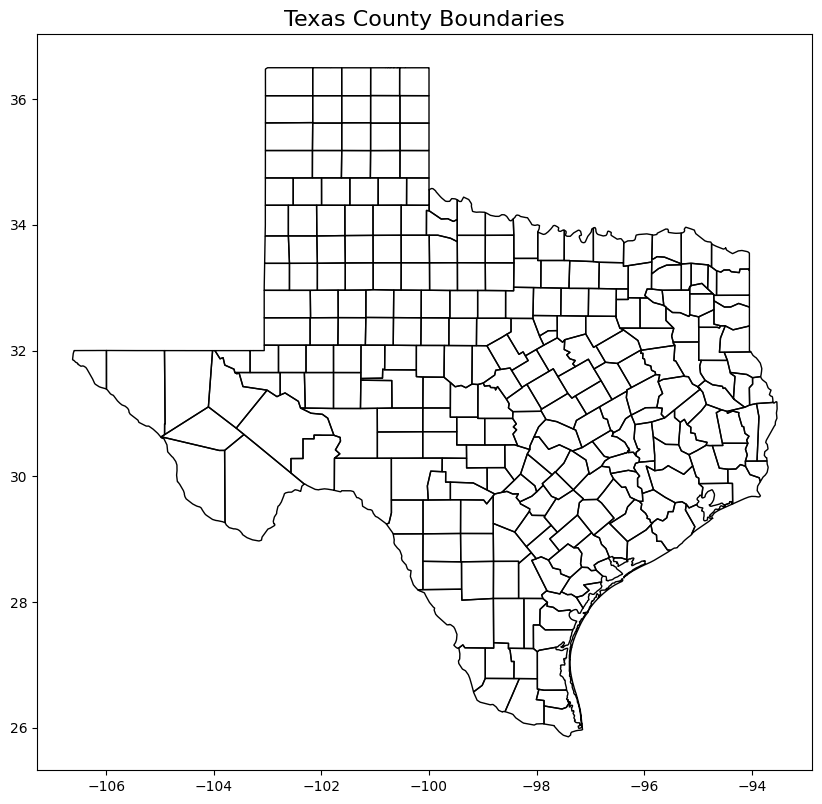

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


geo_url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
geo_data = gpd.read_file(geo_url)

df2['fips'] = df2['fips'].astype(str).str.zfill(5)
geo_data = geo_data.set_index('id')
merged_data = geo_data.merge(df2, left_index=True, right_on='fips')
texas_data = merged_data[merged_data['fips'].str.startswith('48')]

fig, ax = plt.subplots(figsize=(10, 10))
texas_data.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
ax.set_title('Texas County Boundaries', fontsize=16)
plt.show()


#### Part 2.2 creating choropleth maps and customization (10 points)

Make a choropleth maps with unemployment rate. Choose another color map from
https://matplotlib.org/stable/users/explain/colors/colormaps.html. Give a title to the figure (use `plt.title`) as well as a title to the legend.


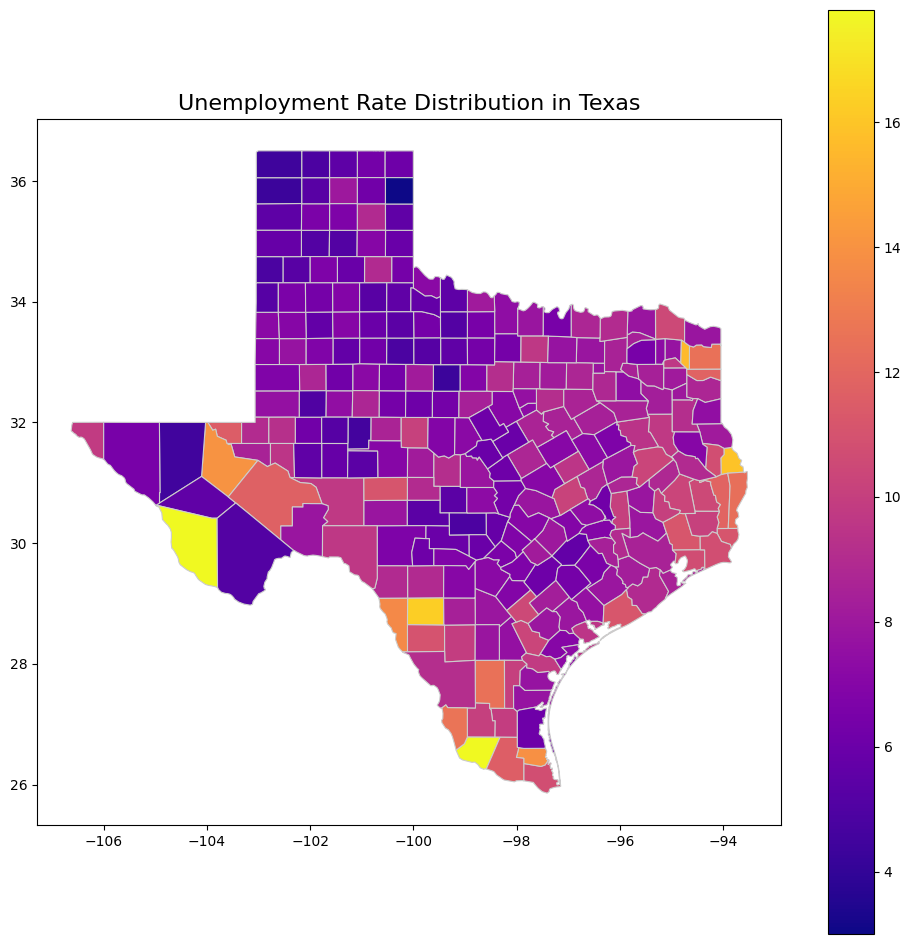

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
texas_data.plot(
    column='unemp',
    cmap='plasma',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)

# add label
plt.title('Unemployment Rate Distribution in Texas', fontsize=16)
plt.show()


#### Part 2.3 Handle the missing values (15 points)

Make a copy of your Texas data. Like what we have done in the lecture, randomly select 30 counties and set the unemployment rate as NaN. Plot the choropleth maps for the unemployment rate again. Define the color, boundary, and hatch pattern for the missing value areas. Also include a legend for the missing areas. Chooes a hatch pattern that is different from the lecture note from here: https://matplotlib.org/devdocs/gallery/shapes_and_collections/hatch_style_reference.html

<ipython-input-89-224f285fd362>:29: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler



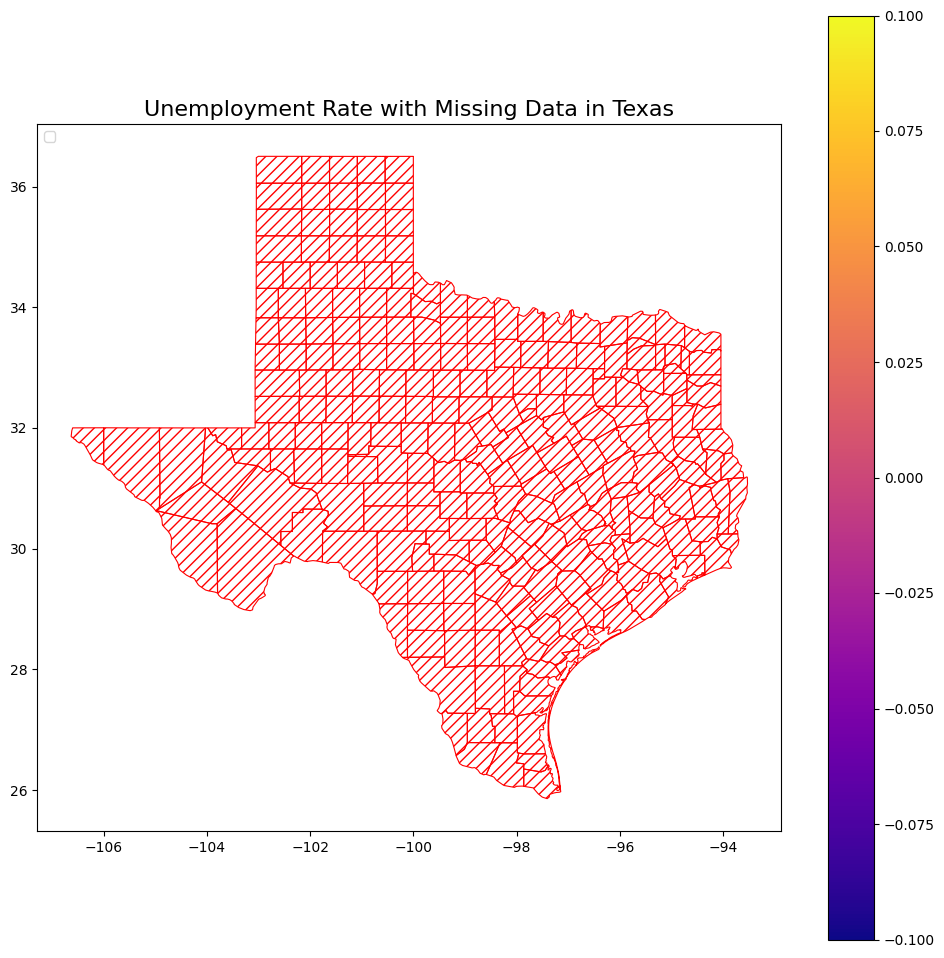

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

texas_data_copy = texas_data.copy()

np.random.seed(42)
missing_indices = np.random.choice(texas_data_copy.index, size=30, replace=False)
texas_data_copy.loc[missing_indices, 'unemployment_rate'] = np.nan

# Choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# unemp map
texas_data_copy.plot(
    column='unemployment_rate',
    cmap='plasma',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    missing_kwds={
        "color": "none",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing Data"
    }
)

plt.legend(loc="upper left", fontsize=10)
plt.title('Unemployment Rate with Missing Data in Texas', fontsize=16)

plt.show()


#### Part 2.4 Multiple-layer plots (25 points)

There is another attribute in the data which is called `pop`. This attributes represent the population in each county. This is a highly skewed attributed thus we first create a new attribute called `logpop`, which is the log of the population. Then make a map with two layers, one layer is the `logpop` and the second layer is `unemp`. Overlap both layers on the same map. Create one static figure and one interactive figure. In the interactive figure, the user should be able to select one or both layer to show and when they click the county, the information of population and unemployment rate are displayed.

Note: You may need to create another copy of the data to show both layers. Also, you may need to add some transparency to the top layer so that the bottom layer can be seen.

In the end, discuss how the overlapping colors and transparency factor affect people's understanding.

In [ ]:
import numpy as np

# assume texas_data is a geodataframe which include poplog and unemp data field
texas_data_copy = texas_data.copy()

# calculate logpop
texas_data_copy['logpop'] = texas_data_copy['pop'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# clean the data
texas_data_copy = texas_data_copy.replace([np.inf, -np.inf], np.nan).dropna(subset=['logpop', 'unemp'])

texas_data_copy[['pop', 'logpop', 'unemp']].head()



,pop,logpop,unemp
2698,6177,8.728588,6.3
2699,967,6.874198,5.5
2703,55138,10.917594,8.4
2709,5238,8.563695,8.5
2710,68605,11.136121,5.1


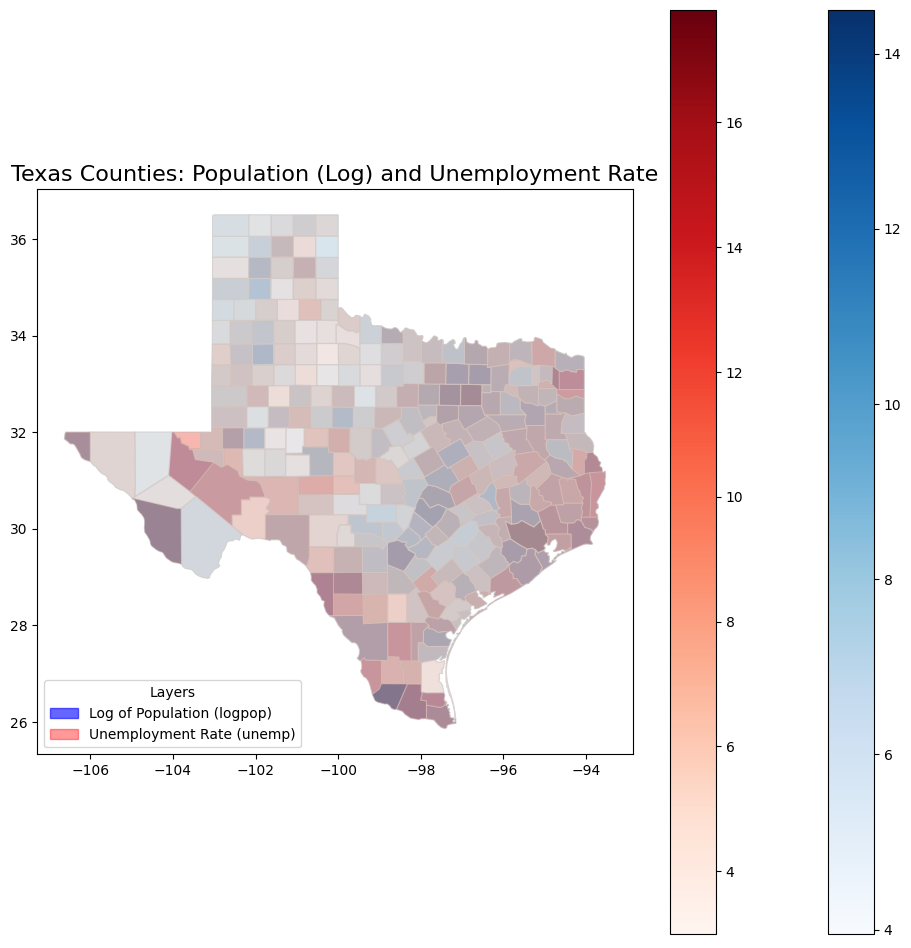

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# logpop
texas_data_copy.plot(
    column='logpop',
    cmap='Blues',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    alpha=0.6,
    norm=Normalize(vmin=texas_data_copy['logpop'].min(), vmax=texas_data_copy['logpop'].max())
)

# unemp
texas_data_copy.plot(
    column='unemp',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    alpha=0.4
)
plt.title('Texas Counties: Population (Log) and Unemployment Rate', fontsize=16)
logpop_patch = mpatches.Patch(color='blue', alpha=0.6, label='Log of Population (logpop)')
unemp_patch = mpatches.Patch(color='red', alpha=0.4, label='Unemployment Rate (unemp)')
plt.legend(handles=[logpop_patch, unemp_patch], loc='lower left', fontsize=10, title="Layers")

# plot
plt.show()


In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo

fips = unemp_data_clean_subset['fips']
logpop = unemp_data_clean_subset['logpop']
unemp = unemp_data_clean_subset['unemp']
trace1 = go.Bar(x=fips, y=logpop, name='Log of Population', marker=dict(color='blue', opacity=0.6))
trace2 = go.Bar(x=fips, y=unemp, name='Unemployment Rate', marker=dict(color='red', opacity=0.4))

# combine the layer
data = [trace1, trace2]
layout = go.Layout(title='Population (Log) and Unemployment Rate by County',
                   xaxis=dict(title='FIPS Code'),
                   yaxis=dict(title='Values'),
                   barmode='overlay')

fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig)
